In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Read the data
df = pd.read_csv('download.csv')

# Display first few rows
print("First five rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

First five rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

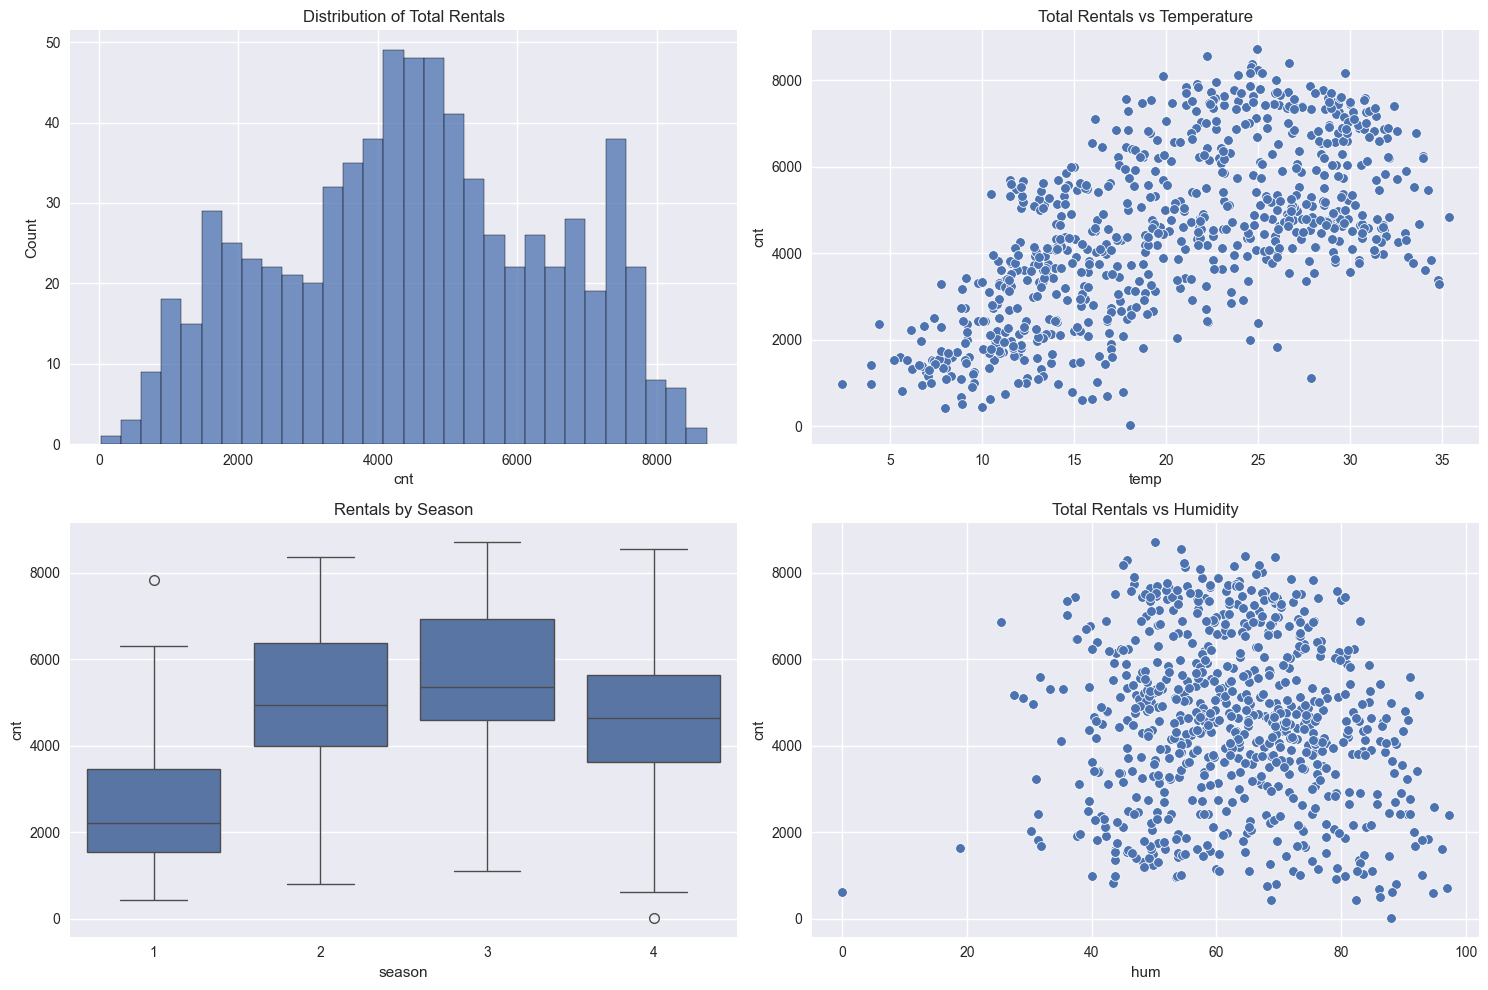

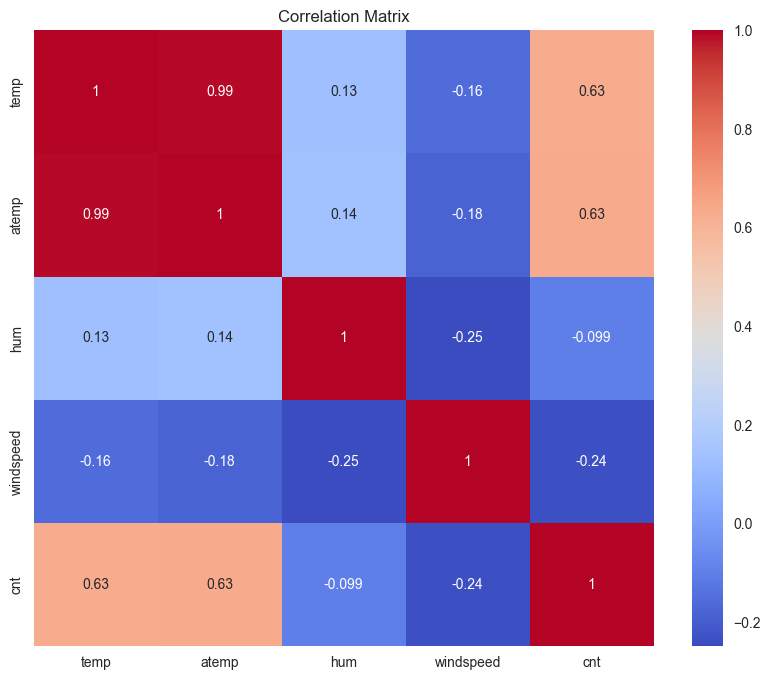

Correlation with total rentals (cnt):
cnt          1.000000
atemp        0.630685
temp         0.627044
hum         -0.098543
windspeed   -0.235132
Name: cnt, dtype: float64


In [21]:


# Create the visualizations
plt.style.use('seaborn-v0_8')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of total rentals
sns.histplot(data=df, x='cnt', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribution of Total Rentals')

# Plot 2: Rentals vs Temperature
sns.scatterplot(data=df, x='temp', y='cnt', ax=axes[0,1])
axes[0,1].set_title('Total Rentals vs Temperature')

# Plot 3: Rentals by Season
sns.boxplot(data=df, x='season', y='cnt', ax=axes[1,0])
axes[1,0].set_title('Rentals by Season')

# Plot 4: Rentals vs Humidity
sns.scatterplot(data=df, x='hum', y='cnt', ax=axes[1,1])
axes[1,1].set_title('Total Rentals vs Humidity')

plt.tight_layout()
plt.show()

# Create correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print correlation analysis
print("Correlation with total rentals (cnt):")
print(correlation_matrix['cnt'].sort_values(ascending=False))

In [11]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = df[['temp']]  # Using temperature as predictor
y = df['cnt']     # Target variable is total rentals

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print model coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Temperature coefficient: {model.coef_[0]:.2f}")

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

Model Coefficients:
Intercept: 1175.85
Temperature coefficient: 164.33

Model Performance:
Training R² Score: 0.4018
Testing R² Score: 0.3700
Training RMSE: 1497.82
Testing RMSE: 1528.97


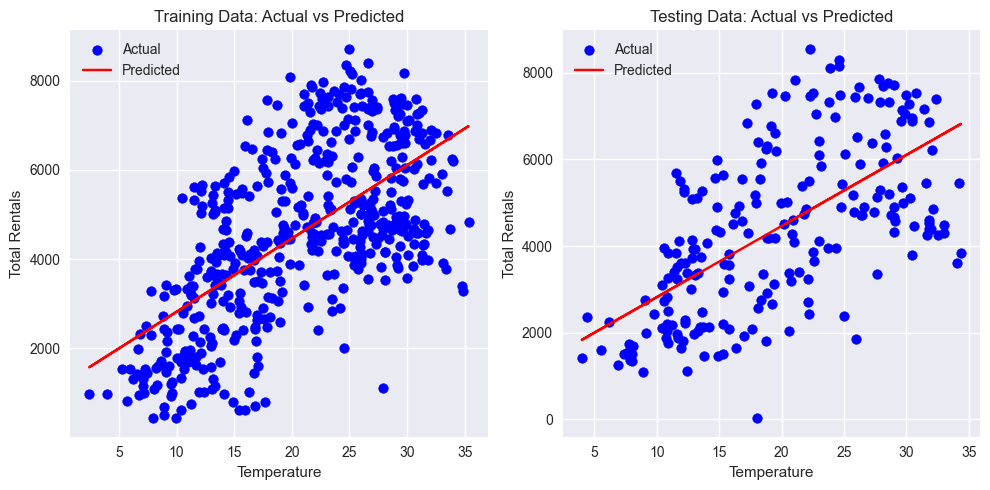

In [12]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Training Data: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Key Findings:

1. Temperature has a significant positive correlation with bike rentals
2. The linear regression model shows temperature is a good predictor of rental demand
3. The model's R² score indicates that temperature alone explains a significant portion of the variance in rental patterns
4. The RMSE values provide a measure of prediction accuracy in the same units as the target variabl